# Titanic: Machine Learning from Disaster

**------(NOTE)---------**

*This notebook is not yet finished, as I will update this kernel further*

**---------------------**

In this notebook, we will explore the Titanic dataset where we want to find out what were the factors of survining and dying during ship sinking.

We will do the following steps (**step** - done step):

0. **Retrieve the data**
1. Explore the data
2. Preprocess the data
3. Model the data
4. Train and test the model
5. Evalutaion and presentation

We will cover all those steps using Python with its packages numpy, pandas, matplotlib and scikit-learn, maybe even use the PyTorch module later on.

## Step 0: Retrieve the data and load

We will retrieve Titanic Dataset from the Kaggle website https://www.kaggle.com/c/titanic, where we will use the simple API provided by the Kaggle that we will retrieve and read the data.

Assuming we have downloaded the necessary data, it is time to load the data into the pandas dataframe. We will also include the packages right away that are needed for data exploration step.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

df = pd.read_csv('../input/train.csv')

Now that we have loaded the data, we will print the first 10 rows of data to see what we're dealing with. Also, we will test if there are any duplicate rows in the data.

In [2]:
df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:

len(df)

891

In [4]:
df.duplicated().value_counts()

False    891
dtype: int64

In [5]:
df['PassengerId'].is_unique

True

As we can see, there are no duplicate rows nor duplicate PassengerId, which means that each row is unique on its own and we don't need to disregard any data. We will test for each column if we don't have any data regarding to it in the next step.

## Step 1: Explore the data

We will do some explorations, analytics and describe some events regarding this dataset. We will go now column by column, describing the data in the proces. First, we want to see how many survivors do we have in the dataset.

We will do the following analysis of how much impact next columns has on survival rate of passengers:

- Gender
- Age group
- Siblings/Spouse
- Parents/Children
- PClass
- Fare
- Cabin

I believe that Name and Ticket are columns that have no impact on survival rate of each passenger. I don't think that certains names don't raise or lowers the chances of surviving a disaster, as well as tickets, since they are, in some ways, another ways of identification. Also, the Port of Embarkation also doesn't have an impact, since I believe that the location where passengers have entered the ship don't have that much significance. Even if we can find the correlation, for example, people who ported in Queenstown have higher chances of surviving, but that doesn't guarantee us for the next ship how will it behave. Instead, we want to analyze the traits of human being and its behaviour and location in the ship: How old is the passenger, does he/she have siblings, parents, children, where is he/she located in the ship, what gender is the passenger, cabin location and more.

Of course, every next analytics will combine with previous, if needed, for further proving hypothesis'. I will list all analytics in this section and I will provide explanations why I will include or not include certain columns in modeling the data for predicting survival rate of passengers.

For now, I have decided on next columns that will go in the preprocessing and modeling part of the project:

- Sex
- Age (engineered in age group)

### Gender analysis

We want to see if the passengers are uniformly distributed or if there is some kind of correlation with the likelihood of surviving the accident. We will begin our research by seeking how many survivors do we, actually, have.

In [6]:
survival = {0: 'Not Survived', 1: 'Survived'}

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Let's normalize the input and calculate the proportion of those passengers who died and who survived.

In [7]:
prop_survived = df['Survived'].value_counts() / len(df)


Not Survived    0.616162
Survived        0.383838
Name: Survived, dtype: float64


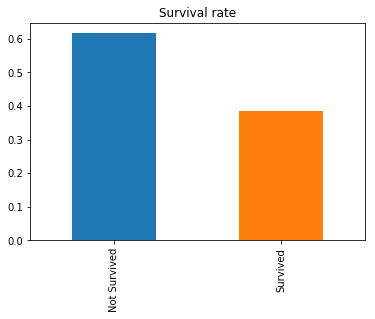

In [8]:
prop_survived = prop_survived.rename(survival)
print(prop_survived)

prop_survived.plot(kind='bar', title='Survival rate')

As we can see, we have around 61% who died during the Titanic sinking and around 38% survivors in our dataset.

Our next step in our analytics is to measure the proportion of male and female passangers.

In [9]:
gender_data = df['Sex']

gender_data[:10]

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object

In [10]:
# We want to see whether we have NaN values for our genders
gender_data.isna().value_counts()

False    891
Name: Sex, dtype: int64

In [11]:
prop_gender = gender_data.value_counts() / len(gender_data)

In [12]:
print(prop_gender)

male      0.647587
female    0.352413
Name: Sex, dtype: float64


We have around 64% male and around 35% female passengers. Now we want to find out how many males and how many females survived in the sinking of Titanic.

In [13]:
male_female_survived = df.groupby(by=['Sex', 'Survived']).size().reset_index().rename(columns={0: 'Count'})

male_female_survived

,Sex,Survived,Count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


Text(0.5,1,'Survival rate by Gender')

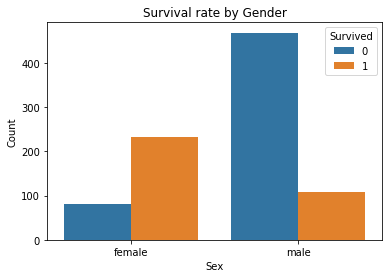

In [14]:
import seaborn as sns

sns.barplot(x='Sex', y='Count', hue='Survived', data=male_female_survived).set_title('Survival rate by Gender')

In [15]:
# now we calculate the percentage
prop_male_female_survived = male_female_survived.copy()

prop_male_female_survived['Count'] = prop_male_female_survived['Count'] / prop_male_female_survived['Count'].sum()
prop_male_female_survived.rename(columns={'Count': 'Percentage'}, inplace=True)

print(prop_male_female_survived)

      Sex  Survived  Percentage
0  female         0    0.090909
1  female         1    0.261504
2    male         0    0.525253
3    male         1    0.122334


We can see that the majority of population that have not survived during the Titanic sinking are males, which means that if a person is a male, according to the analysis, the chances of surviving is minimum.

We will test out how many males have survived, then the females.

In [16]:
male_survived = df[df['Sex'] == 'male']

len(male_survived)

577

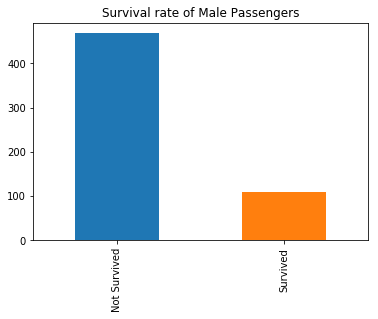

In [17]:
male_survived['Survived'].value_counts().rename(survival).plot(kind='bar', title='Survival rate of Male Passengers')

In [18]:
prop_male_survive = male_survived['Survived'].value_counts().rename(survival) / len(male_survived)
prop_male_survive

Not Survived    0.811092
Survived        0.188908
Name: Survived, dtype: float64

Now we can see, looking only at the males, that we have over 80% casualties. Let's look at the female passengers.

In [19]:
female_survived = df[df['Sex'] == 'female']

len(female_survived)

314

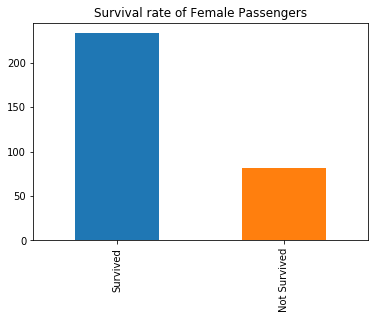

In [20]:
female_survived['Survived'].value_counts().rename(survival).plot(kind='bar', title='Survival rate of Female Passengers')

In [21]:
prop_female_survive = female_survived['Survived'].value_counts().rename(survival) / len(female_survived)
prop_female_survive

Survived        0.742038
Not Survived    0.257962
Name: Survived, dtype: float64

In contrast, looking at the females, we have just under 75% female passengers that have survived the disaster, meaning that the sex plays a significant role whether a passenger will survive or not.

### Age group analysis

As we have seen, the gender plays a big role of determining the chance of surviving favouring female passengers.

We will divide age groups with the following:
0. minimum_age - 14
1. 15 - 24
2. 25 - 40
3. 41 - 65
4. 65 - max_age

Not every passenger has an age provided, so we will calculate how many passengers do not have the age provided.

In [22]:
# dividing into age groups
df['Age'].isna().value_counts()


False    714
True     177
Name: Age, dtype: int64

In [23]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We can see that there are a somewhat significant portion of passengers with no provided age, so we will calculate the mean of other ages. We also see that the age is not consistent, so we will try to group them in age groups, as specified before

In [24]:
from math import modf

# We want the integer part of the mean to take for fillna()
# We also will not change the df, so we will save it to df_modified

# For now, we will assume they are all in the mean
# Note: Include deviation part?
df_modified = df[['PassengerId', 'Survived', 'Sex', 'Age']].copy()

df_modified['Age'] = df_modified['Age'].fillna(modf(df['Age'][df['Age'].notna()].mean())[1])

In [25]:
df_modified[-10:]

,PassengerId,Survived,Sex,Age
881,882,0,male,33.0
882,883,0,female,22.0
883,884,0,male,28.0
884,885,0,male,25.0
885,886,0,female,39.0
886,887,0,male,27.0
887,888,1,female,19.0
888,889,0,female,29.0
889,890,1,male,26.0
890,891,0,male,32.0


Now that we have filled the gaps in the missing age data, we will now add a new column that will add to the age group. We will define a function that will assign each passenger to it's age group. We have seen that the oldest passenger was 80 years old at the time, so that will make the last age group 65-81.

In [26]:
# 0 - [0 -15)
# 1 - [15 - 25)
# 2 - [25 - 40)
# 3 - [40 - 65)
# 4 - [65 - 81)

# Age groups here are left_inclusive

# NOTE: Check to do it with pd.Categorical type

age_groups = {0: (0, 15), 1: (15, 25), 2: (25, 40), 3: (40, 65), 4: (65, 81)}

def which_age_group(x):
    for key, age_group in age_groups.items():
        if x >= age_group[0] and x < age_group[1]:
            return key

df_modified['AgeGroup'] = df_modified['Age'].apply(which_age_group).astype('int64')

In [27]:
df_modified[:10]

,PassengerId,Survived,Sex,Age,AgeGroup
0,1,0,male,22.0,1
1,2,1,female,38.0,2
2,3,1,female,26.0,2
3,4,1,female,35.0,2
4,5,0,male,35.0,2
5,6,0,male,29.0,2
6,7,0,male,54.0,3
7,8,0,male,2.0,0
8,9,1,female,27.0,2
9,10,1,female,14.0,0


Now that we have assigned to each passenger it's AgeGroup, it is time to do some analytics and draw some conclusions. Let see how many have passengers we have for each age group.

AgeGroup
(0, 15)      78
(15, 25)    200
(25, 40)    450
(40, 65)    152
(65, 81)     11
dtype: int64


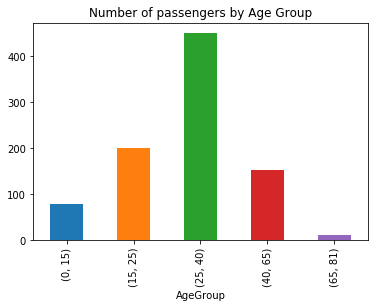

In [28]:
print(df_modified.groupby('AgeGroup').size().rename(age_groups))

df_modified.groupby('AgeGroup').size().rename(age_groups).plot(kind='bar', title='Number of passengers by Age Group')

It is remarkably similar to the normal distribution of age groups in the population of given passengers. Let's see how many have survived for each age group and calculate their percentages.

In [29]:
# looking at the whole population

age_group_survive = df_modified.groupby(['AgeGroup', 'Survived']).size().reset_index().rename(columns={0: 'Count'})

In [30]:
# To get sense of which age group we are talking about, not looking at indices

age_group_survive['AgeGroup'] = age_group_survive['AgeGroup'].apply(lambda x: age_groups[x])

In [31]:
age_group_survive

,AgeGroup,Survived,Count
0,"(0, 15)",0,33
1,"(0, 15)",1,45
2,"(15, 25)",0,127
3,"(15, 25)",1,73
4,"(25, 40)",0,287
5,"(25, 40)",1,163
6,"(40, 65)",0,92
7,"(40, 65)",1,60
8,"(65, 81)",0,10
9,"(65, 81)",1,1


In [32]:
age_group_survive['Survived'] = age_group_survive['Survived'].apply(lambda x: survival[x])

In [33]:
age_group_survive

,AgeGroup,Survived,Count
0,"(0, 15)",Not Survived,33
1,"(0, 15)",Survived,45
2,"(15, 25)",Not Survived,127
3,"(15, 25)",Survived,73
4,"(25, 40)",Not Survived,287
5,"(25, 40)",Survived,163
6,"(40, 65)",Not Survived,92
7,"(40, 65)",Survived,60
8,"(65, 81)",Not Survived,10
9,"(65, 81)",Survived,1


Text(0.5,1,'Survival rate by Age Group')

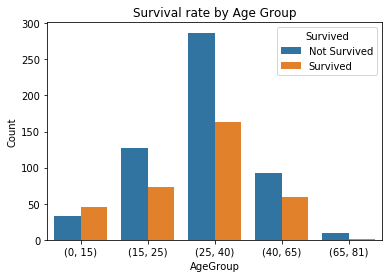

In [34]:
sns.barplot(x='AgeGroup', y='Count', hue='Survived', data=age_group_survive).set_title('Survival rate by Age Group')

We can see that there were a lot of casualties in every age group except the children age group (0, 15), which is not surprising. We will extend these analytics by providing the sex as a key.

First, we will see how many passengers of different sex do we have in each age group

In [35]:
age_group_by_sex = df_modified.groupby(['AgeGroup', 'Sex', 'Survived']).size().reset_index().rename(columns={0: 'Count'})

In [36]:
age_group_by_sex['AgeGroup'] = age_group_by_sex['AgeGroup'].apply(lambda x: age_groups[x])

In [37]:
age_group_by_sex

,AgeGroup,Sex,Survived,Count
0,"(0, 15)",female,0,15
1,"(0, 15)",female,1,24
2,"(0, 15)",male,0,18
3,"(0, 15)",male,1,21
4,"(15, 25)",female,0,17
5,"(15, 25)",female,1,61
6,"(15, 25)",male,0,110
7,"(15, 25)",male,1,12
8,"(25, 40)",female,0,37
9,"(25, 40)",female,1,106


In [38]:
age_group_by_sex['Survived'] = age_group_by_sex['Survived'].apply(lambda x: survival[x])

In [39]:
# NOTE: Check how to plot with combining two columns without the need to create new one

age_group_by_sex['AgeGroupSex'] = age_group_by_sex['AgeGroup'].apply(lambda x: str(x)) + " - " + age_group_by_sex['Sex']

In [40]:
age_group_by_sex

,AgeGroup,Sex,Survived,Count,AgeGroupSex
0,"(0, 15)",female,Not Survived,15,"(0, 15) - female"
1,"(0, 15)",female,Survived,24,"(0, 15) - female"
2,"(0, 15)",male,Not Survived,18,"(0, 15) - male"
3,"(0, 15)",male,Survived,21,"(0, 15) - male"
4,"(15, 25)",female,Not Survived,17,"(15, 25) - female"
5,"(15, 25)",female,Survived,61,"(15, 25) - female"
6,"(15, 25)",male,Not Survived,110,"(15, 25) - male"
7,"(15, 25)",male,Survived,12,"(15, 25) - male"
8,"(25, 40)",female,Not Survived,37,"(25, 40) - female"
9,"(25, 40)",female,Survived,106,"(25, 40) - female"


Text(0.5,1,'Survival rate by sex and age group - females')

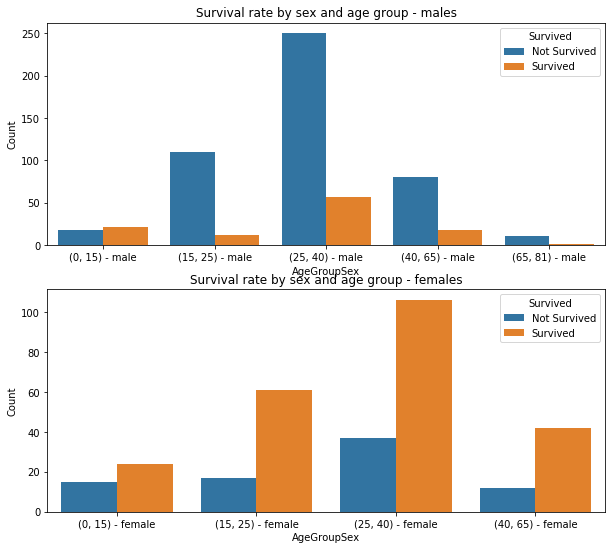

In [41]:
# plotting

a4_dims = (10, 9)
fig, ax = plt.subplots(2, figsize=a4_dims)

survival_by_age_group_males = sns.barplot(ax=ax[0],
                                            x='AgeGroupSex',
                                            y='Count',
                                            hue='Survived',
                                            data=age_group_by_sex[age_group_by_sex['Sex'] == 'male'])

survival_by_age_group_males.set_title('Survival rate by sex and age group - males')

survival_by_age_group_females = sns.barplot(ax=ax[1],
                                            x='AgeGroupSex',
                                            y='Count',
                                            hue='Survived',
                                            data=age_group_by_sex[age_group_by_sex['Sex'] == 'female'])

survival_by_age_group_females.set_title('Survival rate by sex and age group - females')

We can conclude here that age group also plays a role on providing a chance of survival to certain groups of people. That means that age group as category can tell us more about the significance of surviving.

We can conclude that mostly the children and females were saved, further proving the significant role a gender has on survival rate.

### Sibling - spouses analysis

Further analysis and feature engineering required for sibling-spouses analytics. The goal is to test if there is any correlation to minimizing the chance of surviving if a passenger has a sibling or spouse.

We will describe the series to see what we're dealing with.

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

We see that, if someone has a sibling or spouse, it will have tipically 1 or 2, let's see if we can count how many of them we have.

In [44]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

As suspected, tipically it will have 1 or 2, with small portion of them having more.

We can use the feature engineering again to convert the SibSp into a boolean, since a small portion of them would not make a significant change in the model.

In [45]:
df_siblings = df[['PassengerId', 'Survived', 'Sex', 'SibSp', 'Age']].copy()

In [46]:
df_siblings[:6]

,PassengerId,Survived,Sex,SibSp,Age
0,1,0,male,1,22.0
1,2,1,female,1,38.0
2,3,1,female,0,26.0
3,4,1,female,1,35.0
4,5,0,male,0,35.0
5,6,0,male,0,NaN


In [47]:
df_siblings['SibSp'].notna().value_counts()

True    891
Name: SibSp, dtype: int64

We will also use the feature engineering for the age group we have done before, so that we can provide further analysis on the relation siblings/spouse with the certain age group and certain gender.

Also, the column SibSp has no NaN values, so we don't need to do any missing data procedures.

In [48]:
df_siblings['Age'] = df_siblings['Age'].fillna(modf(df['Age'][df['Age'].notna()].mean())[1])
df_siblings['AgeGroup'] = df_siblings['Age'].apply(which_age_group).astype('int64').apply(lambda x: age_groups[x])
df_siblings['HasSibSp'] = df_siblings['SibSp'].apply(lambda x: x > 0)

In [49]:
df_siblings[:6]

,PassengerId,Survived,Sex,SibSp,Age,AgeGroup,HasSibSp
0,1,0,male,1,22.0,"(15, 25)",True
1,2,1,female,1,38.0,"(25, 40)",True
2,3,1,female,0,26.0,"(25, 40)",False
3,4,1,female,1,35.0,"(25, 40)",True
4,5,0,male,0,35.0,"(25, 40)",False
5,6,0,male,0,29.0,"(25, 40)",False


In [50]:
df_siblings['HasSibSp'].value_counts()

False    608
True     283
Name: HasSibSp, dtype: int64

Now that we have the columns HasSibSp, we can see now how many casualties were there regarding the siblings.

In [51]:
# using the whole population
hassib_survival_rate = df_siblings.groupby(['HasSibSp', 'Survived']).size().reset_index().rename(columns={0: 'Count'})

In [52]:
hassib_survival_rate

,HasSibSp,Survived,Count
0,False,0,398
1,False,1,210
2,True,0,151
3,True,1,132


In [53]:
hassib_survival_rate['Survived'] = hassib_survival_rate['Survived'].apply(lambda x: survival[x])

Text(0.5,1,'Survival rate by having siblings or spouse')

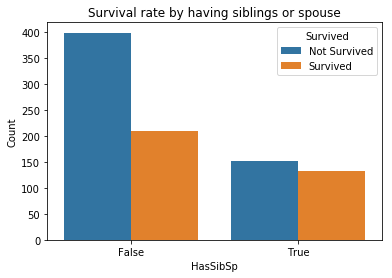

In [54]:
sns.barplot(x='HasSibSp', y='Count', hue='Survived', data=hassib_survival_rate).set_title('Survival rate by having siblings or spouse')

We can see that there are no drastic changes in comparison. We need to prove that having a sibling will not change the outcome of survival. We will check for sibling/spouse for male and female from the sample of population who had siblings or spouse.

In [55]:
passengers_with_siblings = df_siblings[df_siblings['HasSibSp']]
passengers_with_no_siblings = df_siblings[df_siblings['HasSibSp'] == False]

In [56]:
survival_rate_by_sex_and_sibsp = passengers_with_siblings.groupby(['Sex', 'Survived']).size().reset_index().rename(columns={0: 'Count'})
survival_rate_by_sex_and_nosibsp = passengers_with_no_siblings.groupby(['Sex', 'Survived']).size().reset_index().rename(columns={0: 'Count'})

In [57]:
survival_rate_by_sex_and_sibsp

,Sex,Survived,Count
0,female,0,44
1,female,1,96
2,male,0,107
3,male,1,36


In [58]:
survival_rate_by_sex_and_nosibsp

,Sex,Survived,Count
0,female,0,37
1,female,1,137
2,male,0,361
3,male,1,73


In [59]:
survival_rate_by_sex_and_sibsp['Survived'] = survival_rate_by_sex_and_sibsp['Survived'].apply(lambda x: survival[x])

survival_rate_by_sex_and_sibsp
# siblings_gender_plot = sns.barplot(x='Sex', y='Count', hue='Survived', data=survival_rate_by_sex_and_sibsp)

# siblings_gender_plot.set_title('Survival rate of having siblings by sex ')

# siblings_gender_plot

,Sex,Survived,Count
0,female,Not Survived,44
1,female,Survived,96
2,male,Not Survived,107
3,male,Survived,36


In [60]:
survival_rate_by_sex_and_nosibsp['Survived'] = survival_rate_by_sex_and_nosibsp['Survived'].apply(lambda x: survival[x])

survival_rate_by_sex_and_nosibsp

,Sex,Survived,Count
0,female,Not Survived,37
1,female,Survived,137
2,male,Not Survived,361
3,male,Survived,73


Text(0.5,1,'Survival rate of not having siblings by sex')

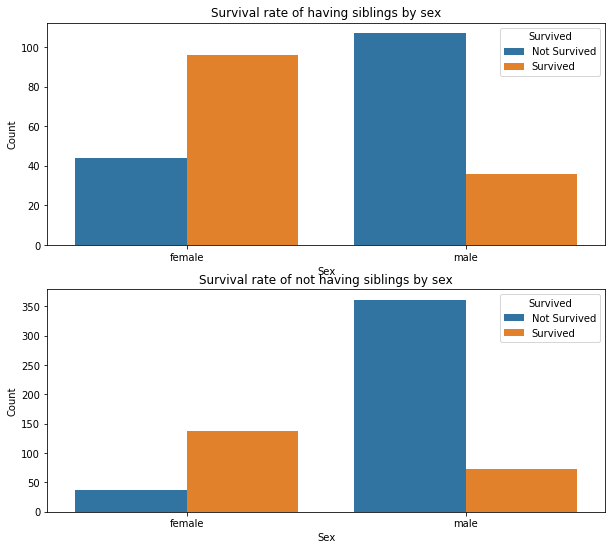

In [61]:
fig, ax = plt.subplots(2, figsize=a4_dims)

survival_has_sib = sns.barplot(ax=ax[0], x='Sex', y='Count', hue='Survived', data=survival_rate_by_sex_and_sibsp)
survival_has_sib.set_title('Survival rate of having siblings by sex')

survival_has_nosib = sns.barplot(ax=ax[1], x='Sex', y='Count', hue='Survived', data=survival_rate_by_sex_and_nosibsp)
survival_has_nosib.set_title('Survival rate of not having siblings by sex')

We don't see some drastic changes in comparison, as well, by looking at the siblings/spouse, and with calculating percentages

In [62]:
survival_rate_by_sex_and_sibsp['Count'] = survival_rate_by_sex_and_sibsp['Count'] / survival_rate_by_sex_and_sibsp['Count'].sum()

In [63]:
survival_rate_by_sex_and_nosibsp['Count'] = survival_rate_by_sex_and_nosibsp['Count'] / survival_rate_by_sex_and_nosibsp['Count'].sum()

In [64]:
survival_rate_by_sex_and_nosibsp

,Sex,Survived,Count
0,female,Not Survived,0.060855
1,female,Survived,0.225329
2,male,Not Survived,0.593750
3,male,Survived,0.120066


In [65]:
# NOTE: Research impact of sibling/spouse on age groups

survival_rate_by_sex_and_sibsp

,Sex,Survived,Count
0,female,Not Survived,0.155477
1,female,Survived,0.339223
2,male,Not Survived,0.378092
3,male,Survived,0.127208


There are no strong impacts of having a sibling. I believe that because there were no more casualties in the has_siblings dataframe, the proportion of them both would tend to some constant *k*, so in the final model, we won't include the sibling/spouse part (bias posibility, unlikely I believe).

Next, we will do parent/child part of analytics. I believe it will have much more impact than sibling/spouse part.

## TODO: Parents/Child analytics